<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">pyIMAGE</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);"><b style=color:red;>Image</b> analysis</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
<td><img style="height: 150px;" src="images/pyIMAGE.png"></td>
</tr>
</table>

----
# Image processing: channel manipulation

In this notebook, we play with the different channels of an image. 

As our example image has a `png` format, we use the `PIL` library and convert the
resulting object to a numpy array for manipulation.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import PIL

<class 'numpy.ndarray'> uint8 3 (3264, 4928, 4)


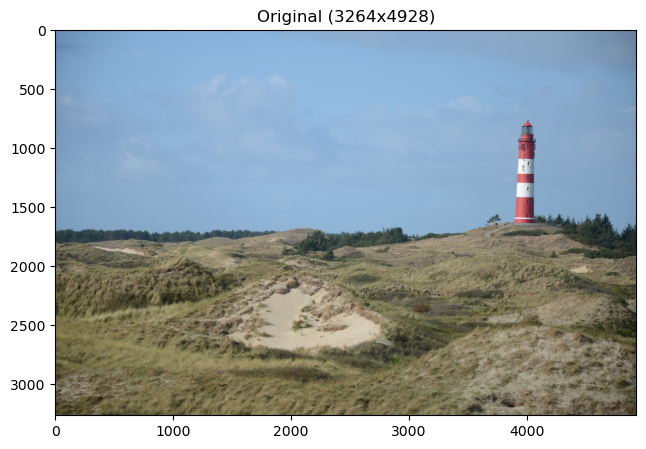

In [2]:
#image file name
infile='images/Amrum.png'

# load image with PIL library, convert to numpy array
image = PIL.Image.open(infile)
image_arr = np.asarray(image)
print (type(image_arr),image_arr.dtype,image_arr.ndim,image_arr.shape)

# show image
fig,axs = plt.subplots(1,1,figsize=(10,5))
axs.set_title('Original ('+str(image_arr.shape[0])+'x'+str(image_arr.shape[1])+')')
axs.imshow(image_arr)

----
## Lower resolution

As first simple approach to downscale the image is to use only every $n$-th pixel
in row and column direction.

<class 'numpy.ndarray'> uint8 3 (164, 247, 4)


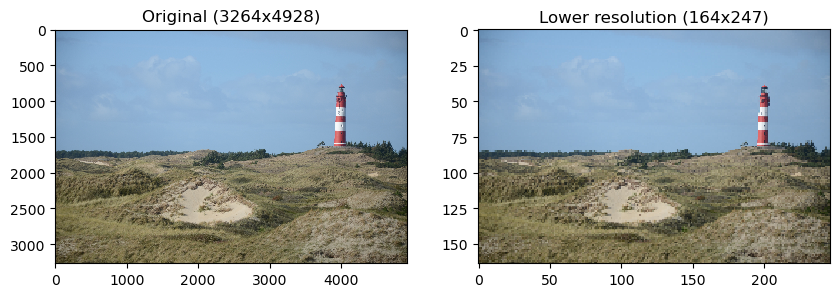

In [3]:
# lower resolution
n=20
image_lower1 = image_arr[::n,::n]
print (type(image_lower1),image_lower1.dtype,image_lower1.ndim,image_lower1.shape)

fig,axs = plt.subplots(1,2,figsize=(10,5))
axs[0].set_title('Original ('+str(image_arr.shape[0])+'x'+str(image_arr.shape[1])+')')
axs[0].imshow(image_arr,interpolation='nearest')
axs[1].set_title('Lower resolution ('+str(image_lower1.shape[0])+'x'+str(image_lower1.shape[1])+')')
axs[1].imshow(image_lower1,interpolation='nearest')

<class 'numpy.ndarray'> uint8 3 (33, 50, 4)


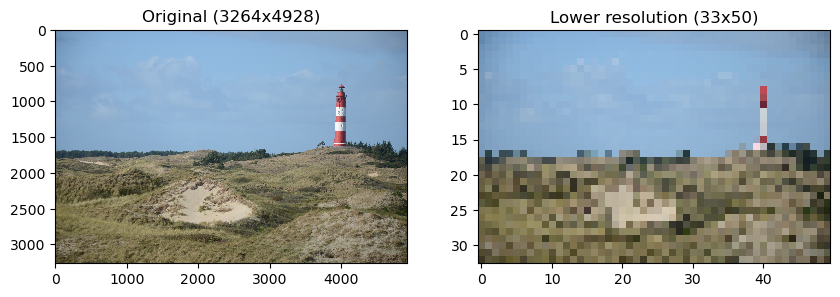

In [4]:
# lower resolution
n=100
image_lower1 = image_arr[::n,::n]
print (type(image_lower1),image_lower1.dtype,image_lower1.ndim,image_lower1.shape)

fig,axs = plt.subplots(1,2,figsize=(10,5))
axs[0].set_title('Original ('+str(image_arr.shape[0])+'x'+str(image_arr.shape[1])+')')
axs[0].imshow(image_arr,interpolation='nearest')
axs[1].set_title('Lower resolution ('+str(image_lower1.shape[0])+'x'+str(image_lower1.shape[1])+')')
axs[1].imshow(image_lower1,interpolation='nearest')

We can use the `resize` function from the `PIL` library instead:

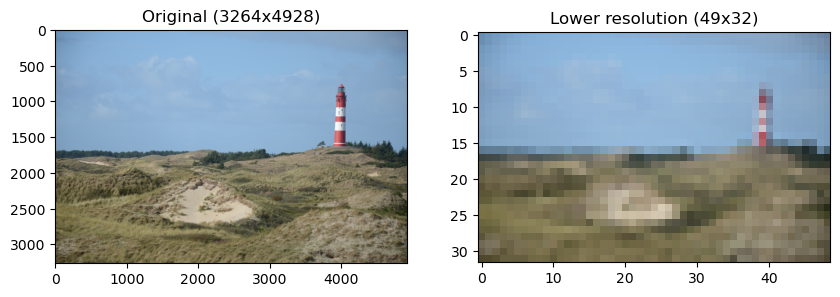

In [5]:
n=100
newsize = (int(image.size[0]/n),int(image.size[1]/n))
image_resize = image.resize(newsize)

fig,axs = plt.subplots(1,2,figsize=(10,5))
axs[0].set_title('Original ('+str(image_arr.shape[0])+'x'+str(image_arr.shape[1])+')')
axs[0].imshow(np.asarray(image))
axs[1].set_title('Lower resolution ('+str(image_resize.size[0])+'x'+str(image_resize.size[1])+')')
axs[1].imshow(np.asarray(image_resize))

----
## Separate rgb channels

r min/max:  11 255
g min/max:  13 255
b min/max:  1 255


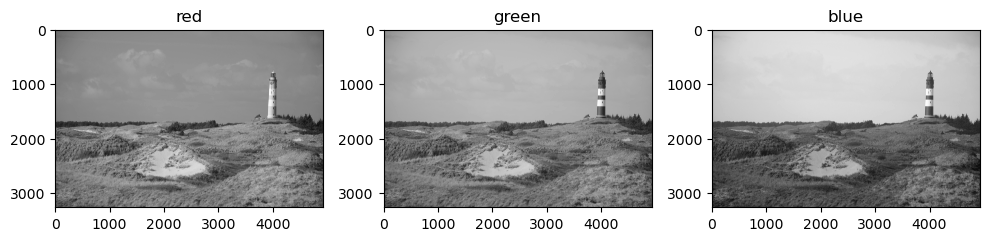

In [8]:
# show red, green, blue channels separately
image_r = image_arr[:,:,0]
image_g = image_arr[:,:,1]
image_b = image_arr[:,:,2]
print('r min/max: ',image_r.min(),image_r.max())
print('g min/max: ',image_g.min(),image_g.max())
print('b min/max: ',image_b.min(),image_b.max())

fig,axs = plt.subplots(1,3,figsize=(10,5))
axs[0].set_title('red')
axs[1].set_title('green')
axs[2].set_title('blue')
axs[0].imshow(image_r,vmin=0,vmax=255,cmap='gray')
axs[1].imshow(image_g,vmin=0,vmax=255,cmap='gray')
axs[2].imshow(image_b,vmin=0,vmax=255,cmap='gray')
plt.tight_layout()

----
## Change colorscale for red channel

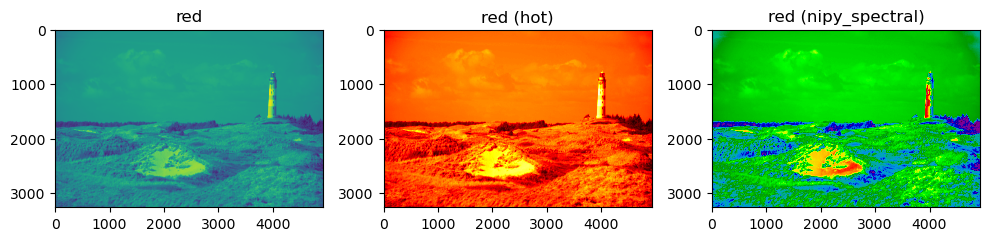

In [6]:
# change colorscale
# show image
fig,axs = plt.subplots(1,3,figsize=(10,5))
axs[0].set_title('red')
axs[0].imshow(image_r,vmin=0,vmax=255)
axs[1].set_title('red (hot)')
axs[1].imshow(image_r,cmap='hot')
axs[2].set_title('red (nipy_spectral)')
axs[2].imshow(image_r,cmap='nipy_spectral')
plt.tight_layout()

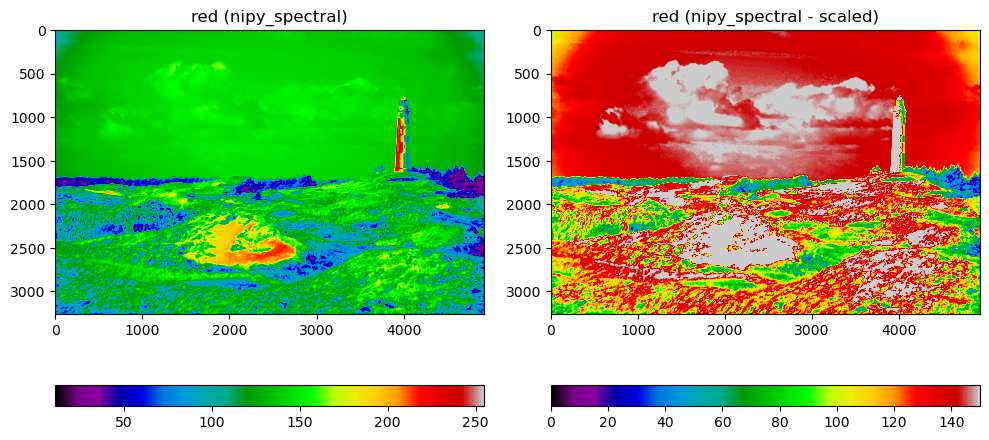

In [7]:
# add colorscale
fig,axs = plt.subplots(1,2,figsize=(10,5))
axs[0].set_title('red (nipy_spectral)')
cbar1=axs[0].imshow(image_r,cmap='nipy_spectral')
plt.colorbar(cbar1,location='bottom')
axs[1].set_title('red (nipy_spectral - scaled)')
cbar2=axs[1].imshow(image_r,cmap='nipy_spectral',clim=(0,150))
plt.colorbar(cbar2,location='bottom')
plt.tight_layout()

----
## Histogram of color channels

Plot the histogram for each rgb color channel...

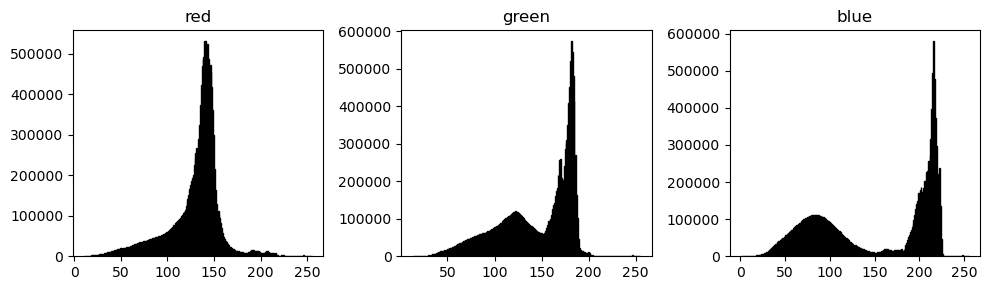

In [8]:
# show histogram
fig,axs = plt.subplots(1,3,figsize=(10,3))
axs[0].set_title('red')
axs[1].set_title('green')
axs[2].set_title('blue')
_=axs[0].hist(image_r.ravel(), bins=256, fc='k', ec='k')
_=axs[1].hist(image_g.ravel(), bins=256, fc='k', ec='k')
_=axs[2].hist(image_b.ravel(), bins=256, fc='k', ec='k')
plt.tight_layout()

----